In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img =cv2.imread('./test_image/moface.jpg')
img.shape

(639, 900, 3)

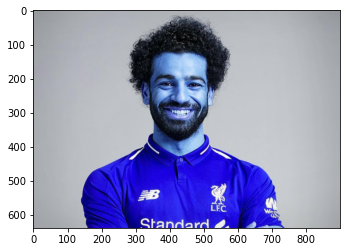

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[157, 157, 157, ..., 156, 156, 156],
       [153, 153, 153, ..., 151, 151, 151],
       [152, 153, 153, ..., 152, 152, 152],
       ...,
       [162, 162, 162, ..., 164, 163, 163],
       [162, 162, 162, ..., 163, 163, 163],
       [162, 162, 162, ..., 163, 163, 163]], dtype=uint8)

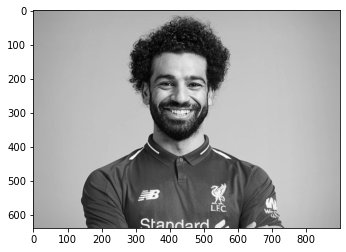

In [5]:
plt.imshow(gray , cmap='gray')

In [6]:
face_cascade= cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces= face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[313, 120, 236, 236]])

In [8]:
# faces 2d array we can save it in x,y,w,h
x,y,w,h =faces[0]
x,y,w,h

(313, 120, 236, 236)

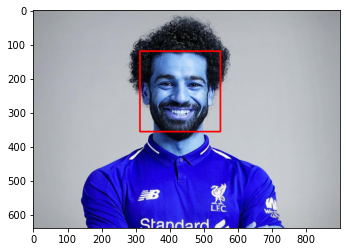

In [9]:
#draw rectangle 
face_img= cv2.rectangle(img, (x,y), (x+h,y+w) , (255,0,0) , 3)
plt.imshow(face_img)

In [ ]:
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h), (132,34,34) , 3)
    #roi_gray=gray[ y:y+h , x:x+w ]
    #crop roi of face
    roi_color=face_img[y:y+h,x:x+w ]
    eyes=eye_cascade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 3)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [11]:
len(eyes)

2

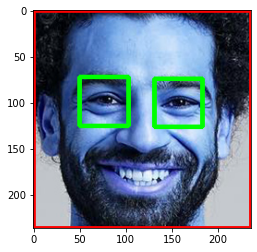

In [12]:
plt.imshow(roi_color)

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img= cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3 ,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
            
            

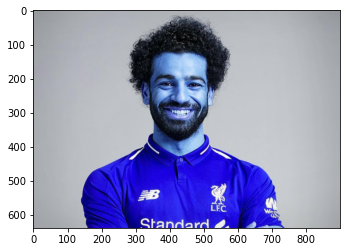

In [14]:
original_image= cv2.imread('./test_image/moface.jpg')
plt.imshow(original_image)

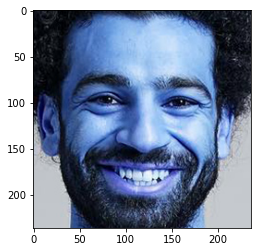

In [15]:
cropped_image= get_cropped_image_if_2_eyes('./test_image/moface.jpg')
plt.imshow(cropped_image)

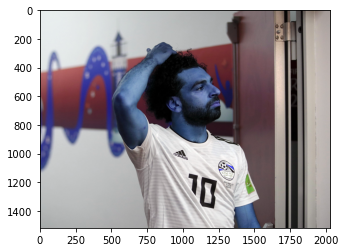

In [16]:
original_image_no_2_eye = cv2.imread('./test_image/obstructed_face.jpg')
plt.imshow(original_image_no_2_eye)

In [17]:
# return null becouse can not detect 2 eyes
cropped_image_no_2_eye= get_cropped_image_if_2_eyes('./test_image/obstructed_face.jpg')
cropped_image_no_2_eye

In [18]:
path_to_data= './dataset/'
path_to_cr_data = './dataset/cropped/'


In [23]:
import os 
img_dirs= []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [24]:
img_dirs

['./dataset/Benzema',
 './dataset/cristiano ronaldo',
 './dataset/elneny',
 './dataset/Messi',
 './dataset/mohamed salah']

In [25]:
# to create crpped file to save cropped image
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [21]:
img_dirs

['./dataset/Benzema',
 './dataset/cristiano ronaldo',
 './dataset/elneny',
 './dataset/Messi',
 './dataset/mohamed salah']

In [26]:
#conver original image to cropped iamge and classifiy it to class which belong for it  

cropped_image_folder_path_dirs=[]
footballer_name_img_dic={}

for img_dir in img_dirs:
    count =1
    footballer_name= img_dir.split('/')[-1]
    print(footballer_name)
    footballer_name_img_dic[footballer_name]=[]
    for entry in os.scandir(img_dir):
        roi_iamge=get_cropped_image_if_2_eyes(entry.path)
        if roi_iamge is not None:
            cropped_image_folder_path_dir= path_to_cr_data  + footballer_name
            if not os.path.exists(cropped_image_folder_path_dir):
                os.mkdir(cropped_image_folder_path_dir)
                print('make cropped folder to save cropped image',cropped_image_folder_path_dir)
                cropped_image_folder_path_dirs.append(cropped_image_folder_path_dir)
                
            cropped_image_name= footballer_name + str(count) + '.png'
            cropped_image_path=cropped_image_folder_path_dir+ '/' + cropped_image_name
            cv2.imwrite(cropped_image_path,roi_iamge)
            footballer_name_img_dic[footballer_name].append(cropped_image_path)
            count+=1
            
    

Benzema
make cropped folder to save cropped image ./dataset/cropped/Benzema
cristiano ronaldo
make cropped folder to save cropped image ./dataset/cropped/cristiano ronaldo
elneny
make cropped folder to save cropped image ./dataset/cropped/elneny
Messi
make cropped folder to save cropped image ./dataset/cropped/Messi
mohamed salah
make cropped folder to save cropped image ./dataset/cropped/mohamed salah


In [27]:
# After Manually examine cropped folder and delete any unwanted images
footballer_name_img_dic = {}
for img_dir in cropped_image_folder_path_dirs:
    footballer_name= img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    footballer_name_img_dic[footballer_name] = file_list
footballer_name_img_dic

{'Benzema': ['./dataset/cropped/Benzema\\Benzema1.png',
  './dataset/cropped/Benzema\\Benzema10.png',
  './dataset/cropped/Benzema\\Benzema12.png',
  './dataset/cropped/Benzema\\Benzema13.png',
  './dataset/cropped/Benzema\\Benzema14.png',
  './dataset/cropped/Benzema\\Benzema15.png',
  './dataset/cropped/Benzema\\Benzema16.png',
  './dataset/cropped/Benzema\\Benzema17.png',
  './dataset/cropped/Benzema\\Benzema18.png',
  './dataset/cropped/Benzema\\Benzema19.png',
  './dataset/cropped/Benzema\\Benzema2.png',
  './dataset/cropped/Benzema\\Benzema20.png',
  './dataset/cropped/Benzema\\Benzema3.png',
  './dataset/cropped/Benzema\\Benzema4.png',
  './dataset/cropped/Benzema\\Benzema5.png',
  './dataset/cropped/Benzema\\Benzema6.png',
  './dataset/cropped/Benzema\\Benzema7.png',
  './dataset/cropped/Benzema\\Benzema8.png',
  './dataset/cropped/Benzema\\Benzema9.png'],
 'cristiano ronaldo': ['./dataset/cropped/cristiano ronaldo\\cristiano ronaldo1.png',
  './dataset/cropped/cristiano ronald

In [28]:
# give number to the class 
class_dic = {}
count = 0
for footballer_name in footballer_name_img_dic.keys():
    class_dic[footballer_name] = count
    count = count + 1
class_dic

{'Benzema': 0,
 'cristiano ronaldo': 1,
 'elneny': 2,
 'Messi': 3,
 'mohamed salah': 4}

In [29]:
# apply wavelet transform to extract meaning features that can help with image identification
# you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

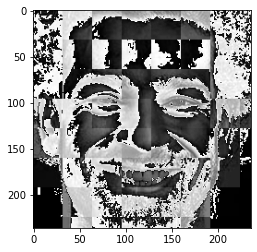

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
# prepare x and y to train the model, x is stack of raw img and wavelet img
X, y = [], []
for footballer_name, training_files in footballer_name_img_dic.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dic[footballer_name])  

In [32]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape
x1=X[0]
x1


array([ 22.,  34.,  36., ..., 213.,  61.,   0.])

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#pipe = Pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', probability=True ,C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8275862068965517

In [41]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.7241379310344828

In [39]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(pipe, 'saved_model.pkl') 



['saved_model.pkl']

In [43]:
import json

with open("class_dictionry.json", "w") as f:
    f.write(json.dumps(class_dic))
    